In [1]:
# cargamos paquetes

# Load necessary packages
library(rstan)
library(coda)
library(R2jags)
library(methods)

# set the working directory

setwd("/home/rstudio/tarea2RegAvanz")

#--- Funciones utiles ---
prob<-function(x){
  out<-min(length(x[x>0])/length(x),length(x[x<0])/length(x))
  out
}

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.8, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)


Attaching package: ‘coda’


The following object is masked from ‘package:rstan’:

    traceplot


Loading required package: rjags

Linked to JAGS 4.3.0

Loaded modules: basemod,bugs


Attaching package: ‘R2jags’


The following object is masked from ‘package:coda’:

    traceplot


The following object is masked from ‘package:rstan’:

    traceplot




In [2]:
source("/home/rstudio/tarea2RegAvanz/claseNietor6.R")

In [5]:
gestacion<-read.csv("https://gente.itam.mx/lnieto/index_archivos/Gestacional.csv",header=TRUE)

In [7]:
head(gestacion)

,Anestesia,Complica,Edad,Escolaridad,Estado_civil,Forma_nac,Hospital,Ind_cesarea,Monitoreo,Mortalidad,Peso_madre,Peso_prod
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,2,1,37,4,1,1,1,2,2,1,60,2.75
2,1,2,22,3,4,2,7,6,2,1,50,2.40
3,2,1,31,1,4,1,5,1,2,1,53,3.30
4,2,2,24,2,4,1,7,5,2,1,99,3.71
5,2,2,39,4,1,1,1,5,2,1,70,3.41
6,1,2,19,1,1,2,5,6,2,1,65,3.25


In [8]:
names(gestacion)

[1] "Anestesia"    "Complica"     "Edad"         "Escolaridad"  "Estado_civil"
 [6] "Forma_nac"    "Hospital"     "Ind_cesarea"  "Monitoreo"    "Mortalidad"  
[11] "Peso_madre"   "Peso_prod"

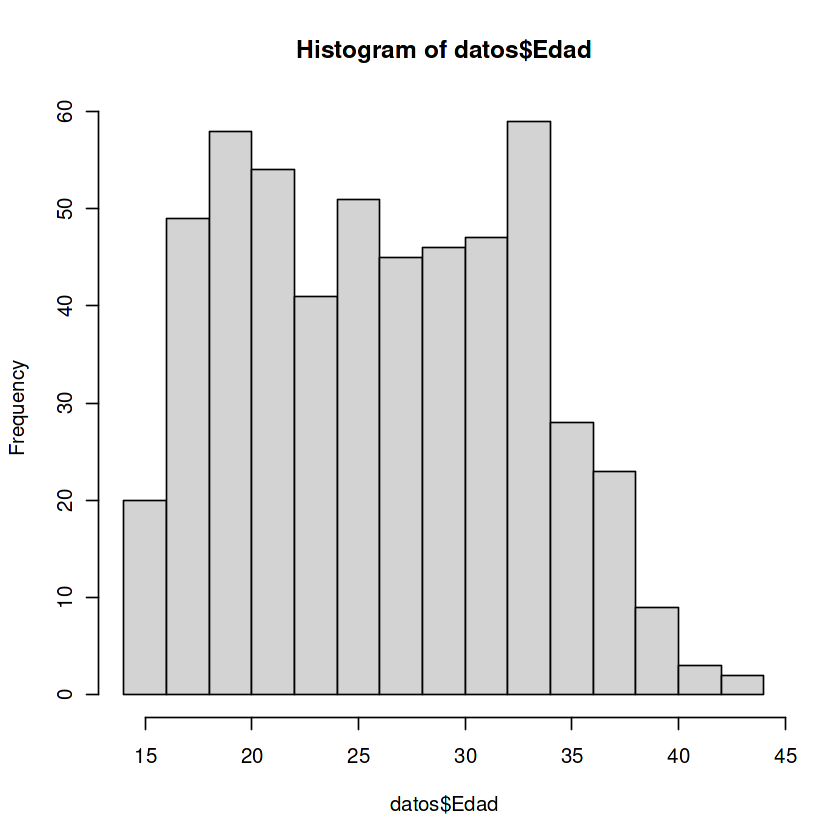

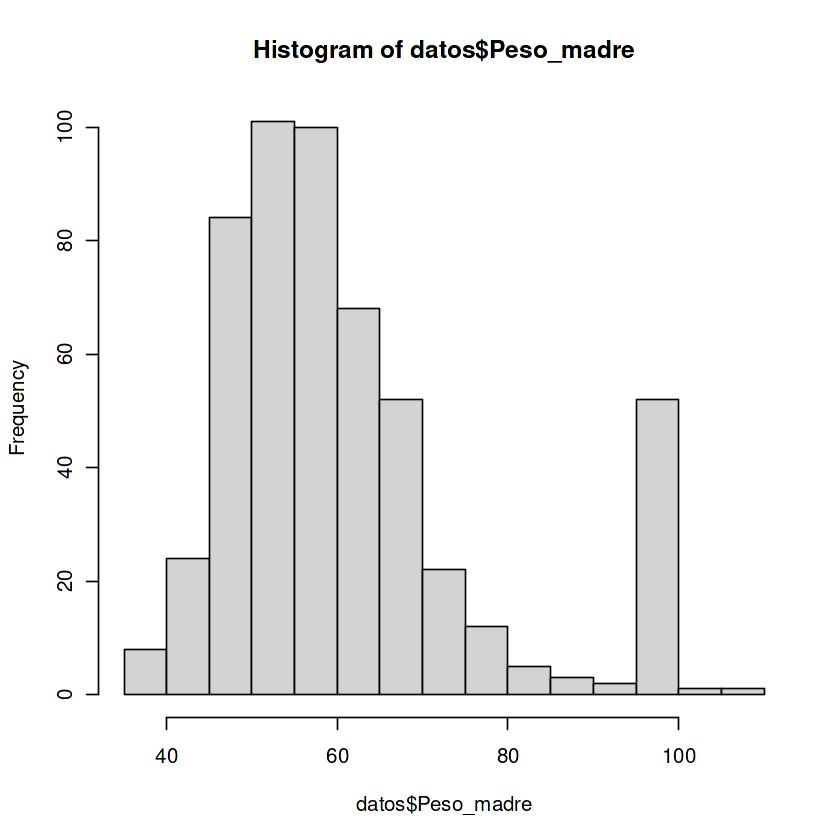

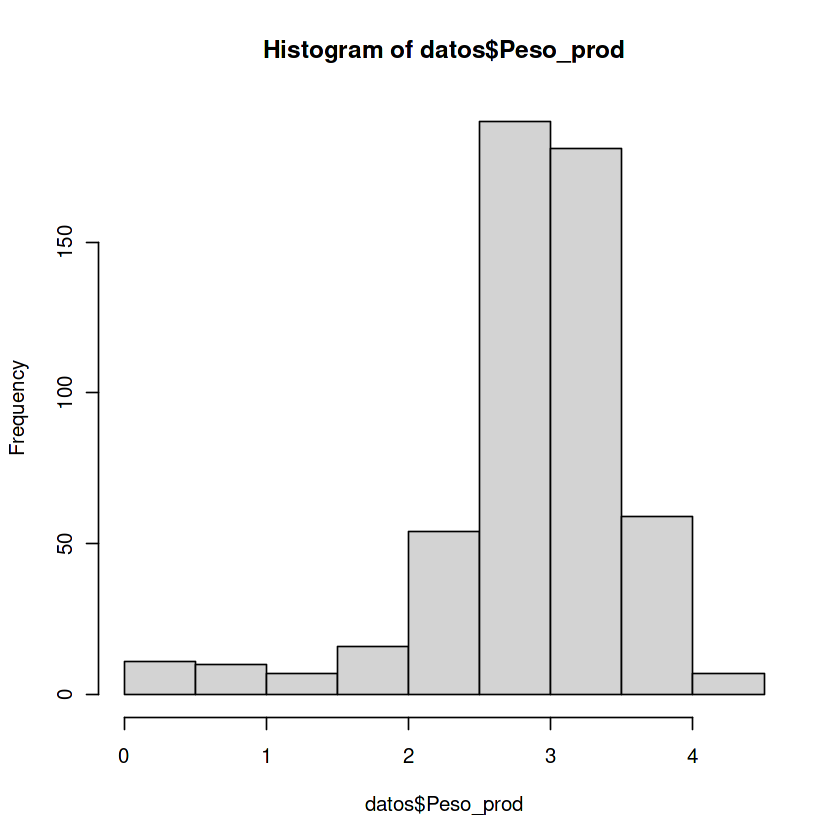

In [10]:
datos <- gestacion

# Histogramas de variables numéricas
hist(datos$Edad)
hist(datos$Peso_madre)
hist(datos$Peso_prod)